<a href="https://colab.research.google.com/github/Chiranjibilawati10/pytorch_fundamentals/blob/main/PyToroch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [20]:
#create known parameters
weight = 0.8
bias = 0.2

In [21]:
#create
start = 0
end = 1
step = 0.005
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0050],
         [0.0100],
         [0.0150],
         [0.0200],
         [0.0250],
         [0.0300],
         [0.0350],
         [0.0400],
         [0.0450]]),
 tensor([[0.2000],
         [0.2040],
         [0.2080],
         [0.2120],
         [0.2160],
         [0.2200],
         [0.2240],
         [0.2280],
         [0.2320],
         [0.2360]]))

In [22]:
len(X), len(y)

(200, 200)

In [23]:
#spliting data into training and tests sets
#create a train/test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:],  y[train_split:]

len(X_test), len(y_test), len(X_train), len(y_train)

(40, 40, 160, 160)

In [24]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    # Plots training data, test data and compares predictions
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Plot predictions in red if they exist and sizes match
    if predictions is not None:
        if len(test_data) == len(predictions):
            plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        else:
            print(f"[Warning] Cannot plot predictions: Mismatch in size → test_data: {len(test_data)}, predictions: {len(predictions)}")

    # Show the legend
    plt.legend(prop={"size": 14})
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.title("Train vs Test vs Predictions")
    plt.show()


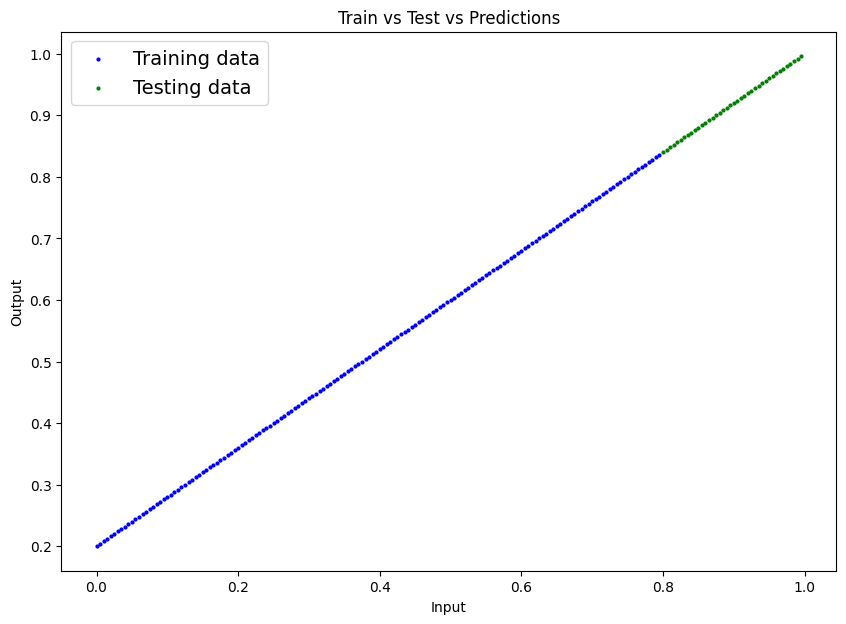

In [25]:
plot_predictions();

In [26]:
#building model
from torch import nn
#creating linear regression model class
class LinearRegressionModel(nn.Module): #almost everything in pytorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1,
                                           requires_grad=True,
                                           dtype=torch.float)
                                )
    self.bias = nn.Parameter(torch.rand(1,
                                         requires_grad=True,
                                         dtype=torch.float)
                              )
  #forward method to define computation in the model
  def forward(self, x:torch.Tensor) ->torch.Tensor: # x is input data
    return self.weights * x + self.bias

In [27]:
torch.rand(1)

tensor([0.3829])

In [28]:
##checking the contents of our pytorch model
#create a random seed
torch.manual_seed(42)

#create an instance of the model - sub class of nn.module
model_0 = LinearRegressionModel()

#check the model parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [29]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [30]:
 #makind predictions using  torch interferance model
X_test, y_test
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[1.6208],
        [1.6252],
        [1.6296],
        [1.6341],
        [1.6385],
        [1.6429],
        [1.6473],
        [1.6517],
        [1.6561],
        [1.6605],
        [1.6649],
        [1.6693],
        [1.6738],
        [1.6782],
        [1.6826],
        [1.6870],
        [1.6914],
        [1.6958],
        [1.7002],
        [1.7046],
        [1.7090],
        [1.7135],
        [1.7179],
        [1.7223],
        [1.7267],
        [1.7311],
        [1.7355],
        [1.7399],
        [1.7443],
        [1.7487],
        [1.7532],
        [1.7576],
        [1.7620],
        [1.7664],
        [1.7708],
        [1.7752],
        [1.7796],
        [1.7840],
        [1.7885],
        [1.7929]])

In [31]:
y_test

tensor([[0.8400],
        [0.8440],
        [0.8480],
        [0.8520],
        [0.8560],
        [0.8600],
        [0.8640],
        [0.8680],
        [0.8720],
        [0.8760],
        [0.8800],
        [0.8840],
        [0.8880],
        [0.8920],
        [0.8960],
        [0.9000],
        [0.9040],
        [0.9080],
        [0.9120],
        [0.9160],
        [0.9200],
        [0.9240],
        [0.9280],
        [0.9320],
        [0.9360],
        [0.9400],
        [0.9440],
        [0.9480],
        [0.9520],
        [0.9560],
        [0.9600],
        [0.9640],
        [0.9680],
        [0.9720],
        [0.9760],
        [0.9800],
        [0.9840],
        [0.9880],
        [0.9920],
        [0.9960]])

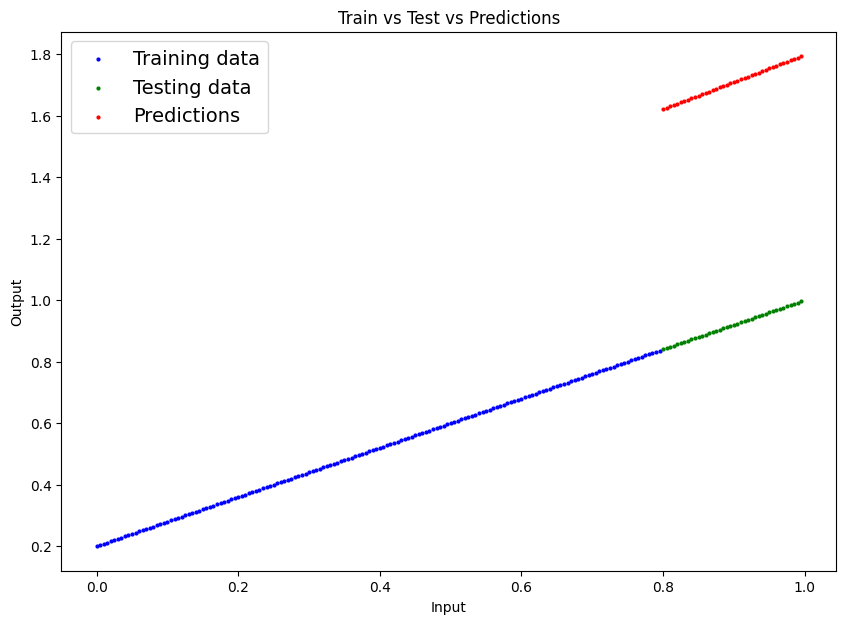

In [32]:
plot_predictions(predictions=y_preds)

In [33]:
#train model
#The whole idea of training model is for a model to move from unkown parameters to some known parameters or in another words from poor represenetation of data to better representation of data
#loss function is used to measure the model predictions
list (model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [34]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [35]:
#setup a loss function
loss_fn = nn.L1Loss()

#setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)


In [39]:
torch.manual_seed(42)
#an epoch is one loop through the data
epochs = 200
epoch_count = []
loss_values = []
test_loss_values = []

#loop through the data
for epoch in range(epochs):
  #set the model to training mode
  model_0.train()
  #forward pass
  y_pred  = model_0(X_train)


  #calculate the loss
  loss = loss_fn(y_pred,y_train)

  #optimizer zero grad
  optimizer.zero_grad()
  #perform backpropagation on the  loss with respect to the parameters of the model
  loss.backward()
  #step the optimizer perform gradient descent
  optimizer.step()

  model_0.eval() #turn off gradients tracking
  with torch.inference_mode():
    #1 Do the forward pass
    test_pred = model_0(X_test)
    #2 calculate the loss
    test_loss = loss_fn(test_pred, y_test)
    test_loss


  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.0218035951256752 | Test loss: 0.05048516392707825
OrderedDict([('weights', tensor([0.6932])), ('bias', tensor([0.2454]))])
Epoch: 10 | Loss: 0.018383726477622986 | Test loss: 0.04229382425546646
OrderedDict([('weights', tensor([0.7103])), ('bias', tensor([0.2383]))])
Epoch: 20 | Loss: 0.014964045956730843 | Test loss: 0.03427519649267197
OrderedDict([('weights', tensor([0.7273])), ('bias', tensor([0.2310]))])
Epoch: 30 | Loss: 0.011544212698936462 | Test loss: 0.026256507262587547
OrderedDict([('weights', tensor([0.7443])), ('bias', tensor([0.2238]))])
Epoch: 40 | Loss: 0.008124290965497494 | Test loss: 0.01823788322508335
OrderedDict([('weights', tensor([0.7613])), ('bias', tensor([0.2165]))])
Epoch: 50 | Loss: 0.004704363644123077 | Test loss: 0.010219193994998932
OrderedDict([('weights', tensor([0.7783])), ('bias', tensor([0.2093]))])
Epoch: 60 | Loss: 0.0016701847780495882 | Test loss: 0.0090542733669281
OrderedDict([('weights', tensor([0.7927])), ('bias', tensor

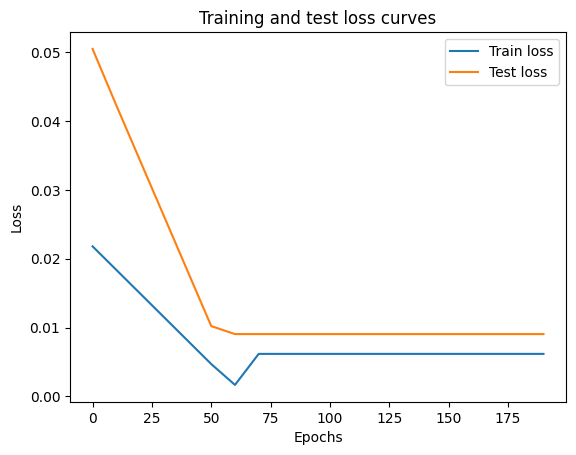

In [45]:
#plot the loss curves
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")

plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [40]:
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8448],
        [0.8488],
        [0.8528],
        [0.8568],
        [0.8608],
        [0.8648],
        [0.8687],
        [0.8727],
        [0.8767],
        [0.8807],
        [0.8847],
        [0.8887],
        [0.8926],
        [0.8966],
        [0.9006],
        [0.9046],
        [0.9086],
        [0.9126],
        [0.9165],
        [0.9205],
        [0.9245],
        [0.9285],
        [0.9325],
        [0.9365],
        [0.9404],
        [0.9444],
        [0.9484],
        [0.9524],
        [0.9564],
        [0.9604],
        [0.9643],
        [0.9683],
        [0.9723],
        [0.9763],
        [0.9803],
        [0.9843],
        [0.9882],
        [0.9922],
        [0.9962],
        [1.0002]])

In [41]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7967])), ('bias', tensor([0.2075]))])

Let's visualize the loss values to see how our model improved over time.

In [ ]:
import numpy as np

# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()